In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [22]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
tf.config.experimental.list_logical_devices('CPU')

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [24]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
train_labels[:10]
train_labels_categorical = keras.utils.to_categorical(train_labels, num_classes=10 ,dtype='int32')
train_labels_categorical[:10]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [27]:
class_names[train_labels[1]]

'T-shirt/top'

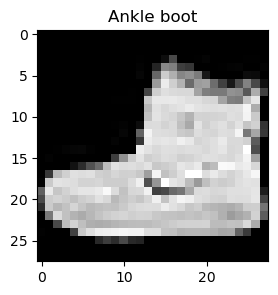

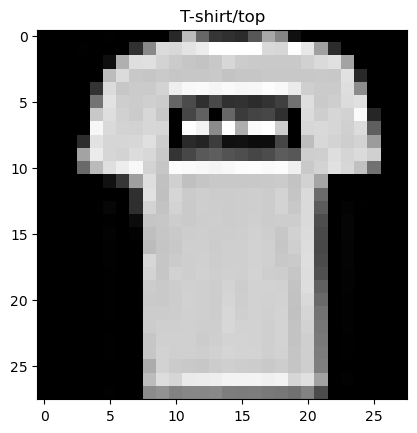

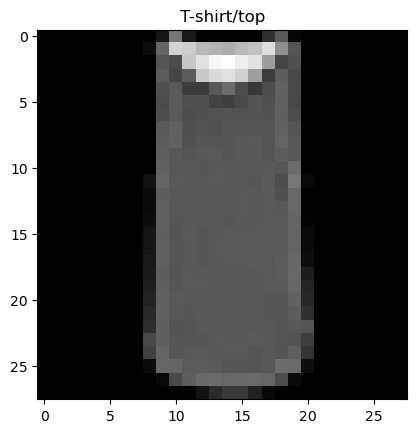

In [28]:
plt.figure(figsize=(3,3))
for i in range(3):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]]) 
    plt.show()

In [29]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

train_images_scaled.shape

(60000, 28, 28)

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    

In [34]:
model.fit(train_images_scaled, train_labels_categorical, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4767 - accuracy: 0.8306
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3579 - accuracy: 0.8691
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3216 - accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3012 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2814 - accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2649 - accuracy: 0.9016
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2530 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2420 - accuracy: 0.9091
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2298 - accuracy: 0.9140
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.222

In [ ]:
np.argmax(model.predict(test_images_scaled)[2])

313/313 [==============================] - 1s 5ms/step


1

In [51]:
test_labels[2]

1

In [52]:
class_names[test_labels[2]]

'Trouser'

In [ ]:

predicted_class = np.argmax(model.predict(test_images_scaled[[2]])[0])  # Use double brackets to keep batch dimension

actual_class = test_labels[2]


print("Predicted class:", class_names[predicted_class])
print("Actual class:   ", class_names[actual_class])

1/1 [==============================] - 0s 35ms/step
Predicted class: Trouser
Actual class:    Trouser
